<a href="https://colab.research.google.com/github/Ron-Rocks/Polynomial-Regression-Tutorial/blob/master/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2

# Polynomial Regression - 

let's see Linear Regression first-

>In a Linear Regresssion we try to represent the given data in the form of a line whose equation is (eg. y = mx + c)

>EXAMPLE-

>>Data -

>>Line predicted -

>Now, this line is used to predict the y value for the given x value -

>eg. predicting value for x=5 (y = 5m + c)


---



But through this method we can only represent the data with a straight line.

In **Polynomial Regression** we can represent the data as a curve :

eg. 2nd degree  -  y = ax^2 + bx + c 

eg. 3rd degree  -  y = ax^3 + bx^2 + bx + c

.
.
.

and so on

Polynimial Regression also help us improve the accuracy of our predictions because it matches the data better than a straight line

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Setting up the Data (Python-generated)



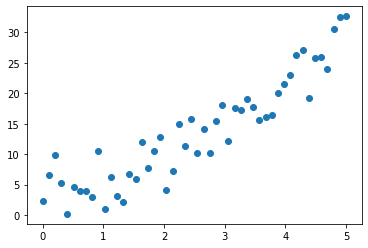

In [0]:
dataLength = 50

x = np.linspace(0,5,dataLength)
y = x**2 +np.random.uniform(0,10,dataLength)

x=x.astype("float32")
y=y.astype("float32")

plt.figure()
plt.scatter(x,y)

##Making the Polynomial Function of the form  



# $ y = w_3 x^3 + w_2 x^2 + w_1 x + b $



In [0]:
class Model:
    def __init__(self):
        self.w1 = tf.Variable(0.1)
        self.w2 = tf.Variable(0.1)
        self.w3 = tf.Variable(0.1)

        self.b = tf.Variable(0.1)

    def __call__(self,x):
        return self.w3 * tf.pow(x,3)+self.w2 * tf.pow(x,2)+self.w1 * tf.pow(x,1)+self.b


Next we define our loss function (ie. mean squared error)

$ 1/n  \sum_{i=1}^{n} (yPred - y)^2$

In [0]:
def loss(y,yPred):
    return tf.math.reduce_mean(tf.square(yPred-y))

# Now we can begin training the model:

>We are using  GradientTape  to take care of computing all the derivatives with respect to the defined variables.

> The Learning Rate is the size of the steps taken while adjusting the variables.

After calculating the derivatives we then subtract the values from the original variable.

For example- If this is the graph of a loss function, then, by calculating the derivative we get the tangent of the curve at that point.
So if the slope of the tangent is positive then the value of the variable will decrease and if it is negative then it will increase, until eventually the value of the variable will reach a point where the loss is the least. This is the lowest part of the curve.

![alt text](https://drive.google.com/uc?id=1kZzoXygp4lP8gzi8IQW3d6HGyO3gd83h)


In [0]:
model  = Model()

learningRate=0.00005

weights,biases=[],[]
epochs = 5000

for i in range(epochs):
    with tf.GradientTape() as t:
        t.watch(model.w1)
        currLoss = loss(y,model(x))

    dw1,dw2,dw3,db = t.gradient(currLoss,[model.w1,model.w2,model.w3,model.b])
    
    
    
    model.w1.assign_sub(learningRate * dw1)
    model.w2.assign_sub(learningRate * dw2)
    model.w3.assign_sub(learningRate * dw3)
    model.b.assign_sub(learningRate * db)

    clear_output()
    plt.scatter(x,y,c="b")
    plt.plot(x,model(x),c="r",linewidth=3)
    plt.show()
    
    time.sleep(5)
    
print(model.w1.numpy(),model.w2.numpy(),model.w3.numpy(),model.b.numpy())
   




# This is a visualization of the predicted polynomial by the model.

[0.34509803921568627, 0.7058823529411765, 0.9607843137254902]


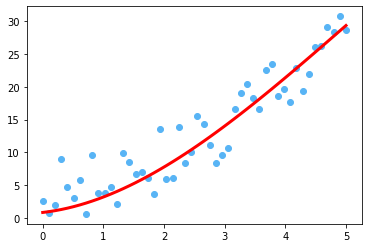

In [0]:
rgbValue = [88,180,245]
colorValue= []
for i in rgbValue:
    colorValue.append(i/255.0)

print(colorValue)
plt.scatter(x,y,color = colorValue)
plt.plot(x,model(x),c="r",linewidth=3)


plt.show()

##Now let us move on to predicting using a given dataset.

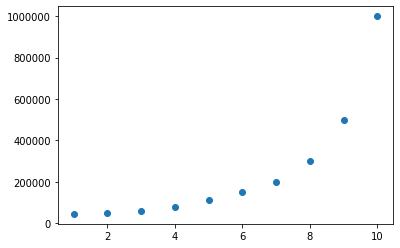

In [0]:
level = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]

salary = [45000,50000,60000,80000,110000,150000,200000,300000,500000,1000000]

positions = ["Business Analyst","Junior Consultant","Senior Consultant","Manager","Country Manager","Region Manager","Partner","Senior Partner","C- Level","CEO"]

plt.scatter(level,salary)

In [0]:
model2  = Model()

learningRate=0.000000001

weights,biases=[],[]
epochs = 10000

for i in range(epochs):
    with tf.GradientTape() as t:
       
        currLoss = loss(salary,model2(level))

    dw1,dw2,dw3,db = t.gradient(currLoss,[model2.w1,model2.w2,model2.w3,model2.b])
    print(currLoss.numpy())
    
    model2.w1.assign_sub(learningRate * dw1)
    model2.w2.assign_sub(learningRate * dw2)
    model2.w3.assign_sub(learningRate * dw3)
    model2.b.assign_sub(learningRate * db)
    
print(model2.w1.numpy(),model2.w2.numpy(),model2.w3.numpy(),model2.b.numpy())
   


tf.Tensor(897.8649, shape=(), dtype=float32) tf.Tensor(22493.168, shape=(), dtype=float32)


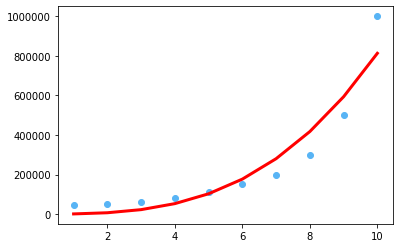

In [0]:
rgbValue = [88,180,245]
colorValue= []
for i in rgbValue:
    colorValue.append(i/255.0)

print(model2(1.0),model2(3.0))
plt.scatter(level,salary,color = colorValue)
plt.plot(level,model2(level),c="r",linewidth=3)
plt.show()